In [2]:
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install scikit-image opencv-python-headless

In [9]:
def process_and_extract_seedlings(image_path):
    image = io.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    cleaned = cv2.erode(thresh, None, iterations=2)
    cleaned = cv2.dilate(cleaned, None, iterations=4)

    contours, _ = cv2.findContours(cleaned.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(cleaned)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    output = cv2.bitwise_and(image, image, mask=mask)

    return output

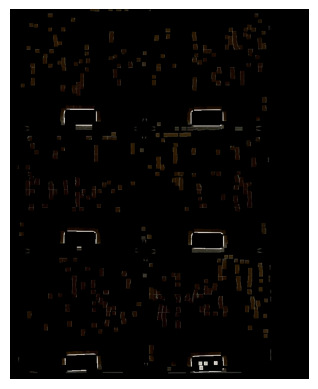

In [8]:
image_path = '/content/drive/My Drive/AgandBio/1.jpg'
extracted_seedlings = process_and_extract_seedlings(image_path)

plt.imshow(cv2.cvtColor(extracted_seedlings, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()